In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

In [2]:
##Loading the dataset
df=pd.read_csv('information.csv',encoding='latin1')

In [3]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [5]:
## check sum of null values in each column
print("The sum of null values in each column is: \n",df.isnull().sum())
print("\n")
print("*******************************************")
print("\n")
##check percentage of null values in each column
print("the percentage of null values in each column is: \n",df.isnull().mean()*100)

The sum of null values in each column is: 
 _unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64


*******************************************


the percentage of null values in each column is: 
 _unit_id                  0.000000
_go

In [6]:
df.columns ## Lists out the column names 

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [7]:
## Removing columns which have high percentage of null values and will not be useful in predicting gender of the user
df.drop(columns=['_unit_id','_last_judgment_at','created','gender_gold','profile_yn_gold','tweet_coord','tweet_location',
                'user_timezone','tweet_id'],axis=1,inplace=True)

Now to further clean the data we must understand the columns and what they mean. 

_golden: they represent whether or not the user was a gold standard memeber or not

_unit_state: state of observation finalized: for contributor_judged golden: for golden members

_trusted_judgement: 

gender: gender of the user

gender:confidence : what is the confidence that the user if of the specified gender\

profile_yn : 'yes' indicates that they were available for data collection 'no' indicates that they were not

profile_yn:confidence : confidence in existence or non-existence of the profile

description: description of the user

fav_number :number of tweets the user has favrouited

link color: the link color on the profile as a hex value

name: the user's entered name'

profileimage: link to the users profile image

retweet_count: number of times the user has retweeted (or possibly, been retweeted)

sidebar_color: color of the profile sidebar, as a hex value

text: text of a random one of the user's tweets

tweet_count: number of tweets by the user

tweet_created: when the tweet in the text column was created


In [8]:
df['gender'].value_counts()## gives the different types of gender and the number of times they have occured

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

Since there are 1117 of 'unknown' gender type. we can drop these as they will not help in prediction

In [9]:
df=df[df['gender']!='unknown']

In [10]:
df['gender'].value_counts()## checking the value counts of the gender column after dropping those rows with 'unknown' gender

female    6700
male      6194
brand     5942
Name: gender, dtype: int64

Checking the number of null values in the gender column

In [11]:
df['gender'].isnull().sum()

97

Now checking the profile_yn column for cleaning

In [12]:
df['profile_yn'].value_counts()## gives the count of different values and the number of times they have occured

yes    18836
no        97
Name: profile_yn, dtype: int64

In [13]:
gender_drop=df['gender'].isnull().index
## Store the indices of those values which have NaN values in gender column

In [14]:
profile_yn_drop=df[df['profile_yn']=='no'].index
## store the indices of those rows which have 'no' in profile_yn column

In [15]:
## Comapre the two lists and see if the indices are common
bool(set(gender_drop).intersection(profile_yn_drop))

True

From this we can see that the rows having 'profile_yn' value as no also have 'gender' as NaN

In [16]:
df=df[df['profile_yn']=='yes']
## Removing those rows which have 'no' value in 'profile_yn' column

In [17]:
df.isnull().sum()

_golden                     0
_unit_state                 0
_trusted_judgments          0
gender                      0
gender:confidence           0
profile_yn                  0
profile_yn:confidence       0
description              3314
fav_number                  0
link_color                  0
name                        0
profileimage                0
retweet_count               0
sidebar_color               0
text                        0
tweet_count                 0
tweet_created               0
dtype: int64

In the 'gender:confidence' column we see that there are many values which are less than 1. therefore these values can be removed  However before removing we must see what percentage of values are these

In [18]:
df[df['gender:confidence']<1].shape

(5032, 17)

From the above line we can see that the number of entries having gender:confidence <1 is 5032 which is approximately 26.7% . Thus these values can be safely removed from the dataframe

In [19]:
df=df[df['gender:confidence']==1]
## Keeping only those rows which have gender:confidence=1

In [20]:
df.shape
## printing the shape of the dataframe

(13804, 17)

In [21]:
df.head()

,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created
0,False,finalized,3,male,1.0,yes,1.0,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40
1,False,finalized,3,male,1.0,yes,1.0,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40
3,False,finalized,3,male,1.0,yes,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40
4,False,finalized,3,female,1.0,yes,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40
5,False,finalized,3,female,1.0,yes,1.0,you don't know me.,3901,F5ABB5,monroevicious,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",20036,10/26/15 12:40


Removing other features which might not be useful in prediction

In [22]:
df.drop (columns = ['_golden','_unit_state','_trusted_judgments','profile_yn','profile_yn:confidence',
                      'tweet_created','profileimage','tweet_count',], inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13804 entries, 0 to 20049
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             13804 non-null  object 
 1   gender:confidence  13804 non-null  float64
 2   description        11773 non-null  object 
 3   fav_number         13804 non-null  int64  
 4   link_color         13804 non-null  object 
 5   name               13804 non-null  object 
 6   retweet_count      13804 non-null  int64  
 7   sidebar_color      13804 non-null  object 
 8   text               13804 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.1+ MB


Now since we have removed all those entries with 'gender:conficence' <1, all the values in that column are 1. therfore that column can also be removed

In [24]:
df.drop(columns='gender:confidence',axis=1,inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13804 entries, 0 to 20049
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         13804 non-null  object
 1   description    11773 non-null  object
 2   fav_number     13804 non-null  int64 
 3   link_color     13804 non-null  object
 4   name           13804 non-null  object
 5   retweet_count  13804 non-null  int64 
 6   sidebar_color  13804 non-null  object
 7   text           13804 non-null  object
dtypes: int64(2), object(6)
memory usage: 970.6+ KB


In [26]:
df.shape

(13804, 8)

Now let us visualize the data so that we can understand it better

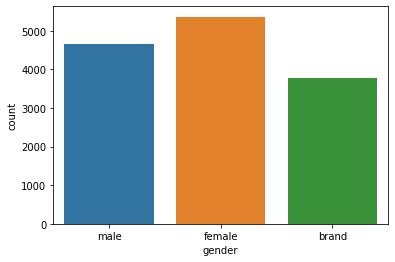

In [27]:
sns.countplot(df['gender'],label="Gender")

##This will create a countplot of the gender column of the data

From the above countplot we can see that the values in the gender column are almost equal in count

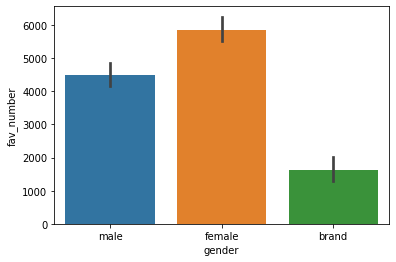

In [28]:
sns.barplot (x = 'gender', y = 'fav_number',data = df)

## This code will create a barplot of gender column with the fav_number(number of tweets the user has favrouited)

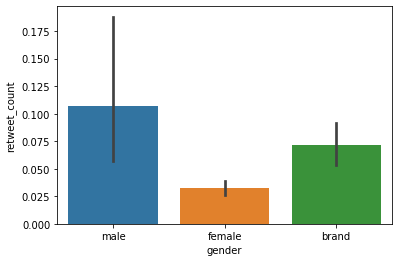

In [29]:
sns.barplot (x = 'gender', y = 'retweet_count',data = df)

## This code will create a barplot of the gender column with the retweet count

Now we will visualize the color attribute(the sidebar color,link_color) of the different values in the gender column

In [30]:
male_top_sidebar_color = df[df['gender'] == 'male']['sidebar_color'].value_counts().head(7)

## This snippet of code will take the top 7 values in the sidebar color
print(male_top_sidebar_color)


C0DEED    2076
FFFFFF     858
0          849
EEEEEE     229
181A1E     142
A8C7F7      88
5ED4DC      48
Name: sidebar_color, dtype: int64


We can see that the third value is just 0. So we will write it as 000000

Index(['C0DEED', 'FFFFFF', '0', 'EEEEEE', '181A1E', 'A8C7F7', '5ED4DC'], dtype='object')
['C0DEED' 'FFFFFF' '0' 'EEEEEE' '181A1E' 'A8C7F7' '5ED4DC']
['C0DEED' 'FFFFFF' '000000' 'EEEEEE' '181A1E' 'A8C7F7' '5ED4DC']


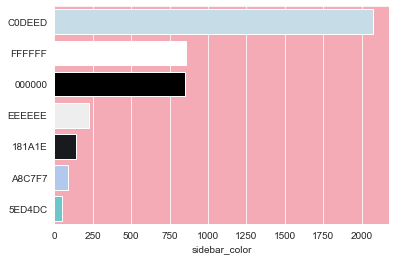

In [31]:
male_top_sidebar_color_idx = male_top_sidebar_color.index
print(male_top_sidebar_color_idx)

## This code will take the index of the value_counts of the male_top_sidebar 

male_top_color = male_top_sidebar_color_idx.values
print(male_top_color)

##This will create a list of the values at each index once

male_top_color[2] = '000000'
## Changing the third value to hexadecimal

print (male_top_color)

l = lambda x: '#'+x

sns.set_style("darkgrid", {"axes.facecolor": "#F5ABB5"})

##Setting the contrast of the grid so that all the bars can be seen

sns.barplot (x = male_top_sidebar_color, y = male_top_color, palette=list(map(l, male_top_color)))
##barplot of the top colors of the sidebar

Similarly writing the same code for gender-female

['C0DEED' 'FFFFFF' '000000' 'EEEEEE' '65B0DA' '5ED4DC' 'CC3366']


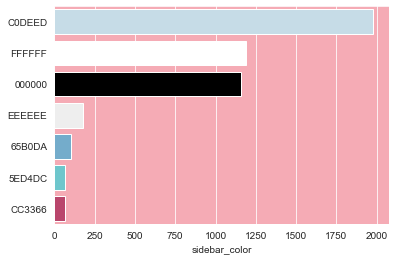

In [32]:
female_top_sidebar_color = df[df['gender'] == 'female']['sidebar_color'].value_counts().head(7)
female_top_sidebar_color_idx = female_top_sidebar_color.index
female_top_color = female_top_sidebar_color_idx.values

female_top_color[2] = '000000'
print (female_top_color)

l = lambda x: '#'+x

sns.set_style("darkgrid", {"axes.facecolor": "#F5ABB5"})
sns.barplot (x = female_top_sidebar_color, y = female_top_color, palette=list(map(l, female_top_color)))


['C0DEED' 'FFFFFF' '000000' 'EEEEEE' 'BDDCAD' '181A1E' 'A8C7F7']


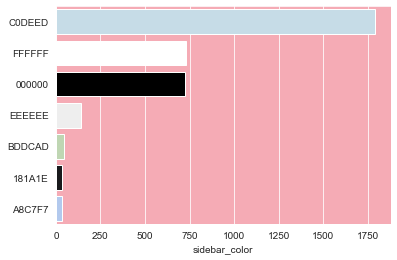

In [33]:
brand_top_sidebar_color = df[df['gender'] == 'brand']['sidebar_color'].value_counts().head(7)
brand_top_sidebar_color_idx = brand_top_sidebar_color.index
brand_top_color = brand_top_sidebar_color_idx.values

brand_top_color[2] = '000000'
print (brand_top_color)

l = lambda x: '#'+x

sns.set_style("darkgrid", {"axes.facecolor": "#F5ABB5"})
sns.barplot (x = brand_top_sidebar_color, y = brand_top_color, palette=list(map(l, brand_top_color)))


Here we can see that the top colors of the three values in gender are overlapping a lot i.e.. they are common. Therfore at this point the column sidebar_color may not be useful in predicting the gender

Doing similar plotting for the link color for the genders in the gender column

0084B4    2346
9999       240
3B94D9     198
2FC2EF     168
DD2E44     123
0          109
ABB8C2     105
Name: link_color, dtype: int64
['0084B4' '009999' '3B94D9' '2FC2EF' 'DD2E44' '000000' 'ABB8C2']


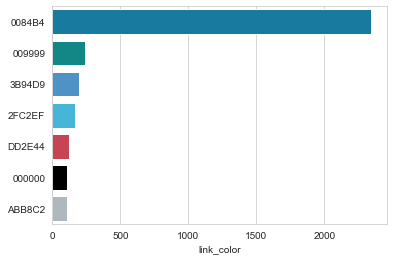

In [34]:
male_top_link_color = df[df['gender'] == 'male']['link_color'].value_counts().head(7)
print(male_top_link_color)
##Gives the value count of the top 7 link color

male_top_link_color_idx = male_top_link_color.index

## Will take the index of each type of color

male_top_color = male_top_link_color_idx.values

##Takes the value of the link color

male_top_color[1] = '009999'
male_top_color[5] = '000000'

## Typing the full hexadecimal value of the link-color
print(male_top_color)

l = lambda x: '#'+x

sns.set_style("whitegrid", {"axes.facecolor": "white"})
## setting the background of the plot so that all bars can be seen

sns.barplot (x = male_top_link_color, y = male_top_link_color_idx, palette=list(map(l, male_top_color)))

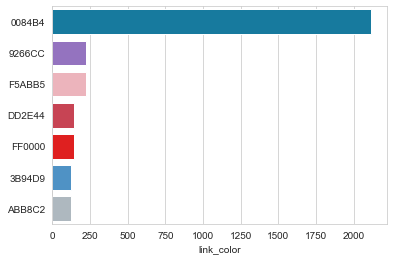

In [35]:
female_top_link_color = df[df['gender'] == 'female']['link_color'].value_counts().head(7)
female_top_link_color_idx = female_top_link_color.index
female_top_color = female_top_link_color_idx.values

l = lambda x: '#'+x

sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.barplot (x = female_top_link_color, y = female_top_link_color_idx, palette=list(map(l, female_top_color)))

Now doing some text cleaning so that it is easier to use in prediction and other places

Removing Stop-words in texts and description

In [36]:
from collections import Counter

twit_vocab = Counter()
for twit in df['text']:
    for word in twit.split(' '):
        twit_vocab[word] += 1

twit_vocab.most_common(20)
## This code will print the 20 most common words in the text

[('the', 8370),
 ('and', 7964),
 ('to', 4196),
 ('I', 3229),
 ('a', 3064),
 ('of', 2741),
 ('in', 2270),
 ('you', 2173),
 ('for', 2157),
 ('The', 2018),
 ('is', 1878),
 ('on', 1621),
 ('my', 1362),
 ('it', 1205),
 ('', 1184),
 ('with', 1156),
 ('Weather', 1074),
 ('that', 1032),
 ('from', 1022),
 ('me', 1001)]

Many of these words dont have anything to do with actual text analysis and can be removed by using the stopwords package from NLTK

In [37]:
from nltk.corpus import stopwords
stop=stopwords.words('English')
## This code will import the stopwords package and will take the stopwords in the english language

In [38]:
twit_vocab_reduced = Counter()
for w, c in twit_vocab.items():
    if not w in stop:
        twit_vocab_reduced[w]=c

twit_vocab_reduced.most_common(20)

## This code will remove all the stopwords from the text data and leave other words

[('I', 3229),
 ('The', 2018),
 ('', 1184),
 ('Weather', 1074),
 ('-', 767),
 ("I'm", 651),
 ('like', 628),
 ('Get', 627),
 ('get', 570),
 ('Updates', 538),
 ('Channel.', 537),
 ('And', 487),
 ('one', 416),
 ('&amp;', 348),
 ('new', 343),
 ('love', 340),
 ('people', 315),
 ('time', 301),
 ('go', 290),
 ('know', 288)]

In [39]:
import re
## the regular expression module will prove very helpful in text cleaning
def cleaning(text):
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

Now to apply Lemmatization to the text and descriptions

In [40]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

The above two blocks of code will be used as functions which will be called during preprocessing

Concatenating the description column with the text column

In [41]:
df['description'].isnull().sum()
## This will return the number of rows with empty description

2031

In [42]:
df['description'].fillna('',inplace=True)
## This will fill the Null values in the description column with ''

In [43]:
df['description'].isnull().sum()

0

Now since the number of null values in the description column is 0, we can concatenate the two columns

In [44]:
df['text_description']=df['text'].str.cat(df['description'],sep=' ')

##This will create a new column in the dataframe with both the text and the description

In [45]:
df['text_description'].isnull().sum()

##This will count the number of null values in the text_description column

0

Creating the dataset for training

In [46]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

y=encoder.fit_transform(df['gender'])

x=df['text_description']

In this case gender is the dependent variable and the text_description column is the independent variable. i.e.. we have to predict the gender of the user based on the text_description values

Now to split the dataset for training and testing

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

##This will create the testing and training dataset

Now feeding this data to the models

### Naive Bayes classifier

In [48]:
from sklearn.naive_bayes import MultinomialNB
# function to split the data for cross-validation

from sklearn.feature_extraction.text import CountVectorizer
# function for transforming documents into counts

In [49]:
vectorizer = CountVectorizer()
x_1 = vectorizer.fit_transform(df['text_description'])
y_1=encoder.fit_transform(df['gender'])

X_train,X_test,Y_train,Y_test=train_test_split(x_1,y_1,test_size=0.3)


nb = MultinomialNB()
nb.fit(X_train, Y_train)

print(nb.score(X_test, Y_test))

0.6948334138097537


We can see that the naive bayes classifier has an accuracy of 68.63%

### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=cleaning)

clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(multi_class='ovr', random_state=0))])

## The 
clf.fit(x_train, y_train)

predictions = clf.predict(x_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))

Accuracy: 0.6699661999034283
Confusion matrix:
 [[ 918   96  108]
 [ 133 1186  316]
 [ 180  534  671]]


We can see that the logistic regression model gives 67.31% accuracy

### Random Forest

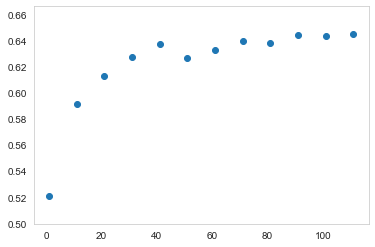

In [51]:
from sklearn.ensemble import RandomForestClassifier
n = range (1,120,10) #step 10

results = []
for i in n:
    clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = i, random_state=0))])
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    results.append(accuracy_score(y_test, predictions))
plt.grid()    
plt.scatter(n, results)

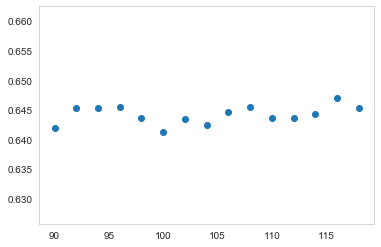

In [52]:
n = range (90,120,2) #step 2

results = []
for i in n:
    clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = i, random_state=0))])
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    results.append(accuracy_score(y_test, predictions))
plt.grid()    
plt.scatter(n, results)

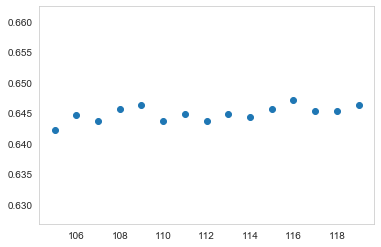

In [53]:
n = range (105,120,1) #step 1

results = []
for i in n:
    clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = i, random_state=0))])
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    results.append(accuracy_score(y_test, predictions))
plt.grid()    
plt.scatter(n, results)

In [54]:
from sklearn.ensemble import RandomForestClassifier

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=cleaning)
clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = 115, random_state=0))])

clf.fit(x_train, y_train)

predictions = clf.predict(x_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))

Accuracy: 0.6455818445195558
Confusion matrix:
 [[ 852  153  117]
 [  97 1343  195]
 [ 142  764  479]]


We can see that the RandomForestClassifier has 63.25% accuracy

### SVM model

In [55]:
from sklearn.svm import SVC

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=cleaning)
clf = Pipeline([('vect', tfidf),
                ('clf', SVC(kernel = 'rbf'))])
clf.fit(x_train, y_train)

predictions = clf.predict(x_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))

Accuracy: 0.6731047802993723
Confusion matrix:
 [[ 912   90  120]
 [ 126 1175  334]
 [ 172  512  701]]


We can see that with the SVM model the accuracy is 67.189%

### Ensemble Learning

In [56]:
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression(multi_class='ovr', random_state=0)
clf2 = RandomForestClassifier(n_estimators = 115, random_state=0)
clf3 = SVC(kernel = 'rbf',probability = True, random_state=0)
clf4 = MultinomialNB()

ensemble_clf = VotingClassifier(estimators=[
        ('lr', clf1), ('svm', clf3),('naive_bayes', clf4)], voting='soft')

clf = Pipeline([('vect', tfidf),
                ('clf', ensemble_clf)])

clf.fit(x_train, y_train)

# ensemble_clf.fit(X_train, y_train)

predictions = clf.predict(x_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))

Accuracy: 0.6825205214872042
Confusion matrix:
 [[ 902  112  108]
 [ 103 1286  246]
 [ 141  605  639]]


In the first case where we use the Logistic Regression model,SVM and naive_bayes classifier the accuracy comes out almost 68%

In [57]:
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression(multi_class='ovr', random_state=0)
clf2 = RandomForestClassifier(n_estimators = 115, random_state=0)
clf3 = SVC(kernel = 'rbf',probability = True, random_state=0)
clf4 = MultinomialNB()

ensemble_clf = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('svm', clf3)], voting='soft')

clf = Pipeline([('vect', tfidf),
                ('clf', ensemble_clf)])

clf.fit(x_train, y_train)

# ensemble_clf.fit(X_train, y_train)

predictions = clf.predict(x_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))

Accuracy: 0.6784162240463544
Confusion matrix:
 [[ 922   89  111]
 [ 126 1226  283]
 [ 171  552  662]]


In the second case where we use the logistic regression,RandomForestClassifier and SVC the accuracy comes out to be 67.33%

In [58]:
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression(multi_class='ovr', random_state=0)
clf2 = RandomForestClassifier(n_estimators = 115, random_state=0)
clf3 = SVC(kernel = 'rbf',probability = True, random_state=0)
clf4 = MultinomialNB()

ensemble_clf = VotingClassifier(estimators=[
        ('rf', clf2), ('svm', clf3),('naive_bayes', clf4)], voting='soft')

clf = Pipeline([('vect', tfidf),
                ('clf', ensemble_clf)])

clf.fit(x_train, y_train)

# ensemble_clf.fit(X_train, y_train)

predictions = clf.predict(x_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))

Accuracy: 0.6788990825688074
Confusion matrix:
 [[ 891  120  111]
 [  93 1325  217]
 [ 136  653  596]]


In the third case using RandomForestClassifier,SVM and naive bayes classifier the accuracy comes out to be 67.33%

In [59]:
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression(multi_class='ovr', random_state=0)
clf2 = RandomForestClassifier(n_estimators = 115, random_state=0)
clf3 = SVC(kernel = 'rbf',probability = True, random_state=0)
clf4 = MultinomialNB()

ensemble_clf = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2),('naive_bayes', clf4)], voting='soft')

clf = Pipeline([('vect', tfidf),
                ('clf', ensemble_clf)])

clf.fit(x_train, y_train)

# ensemble_clf.fit(X_train, y_train)

predictions = clf.predict(x_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))

Accuracy: 0.6788990825688074
Confusion matrix:
 [[ 867  144  111]
 [  82 1387  166]
 [ 122  705  558]]


In the fourth case using logistic regression, Random forest and naive bayes the accuracy is 66.45%

##  Which gender makes more typos in their tweets?

Since there are three gender values in the gender column we will split the dataframe according to the genders and count individually which gender makes the highest number of typos in their tweets

In [60]:
df['gender'].value_counts()

female    5367
male      4653
brand     3784
Name: gender, dtype: int64

In [61]:
male_tweets=df[df['gender']=='male']

##This code will create a different dataframe the gender column will only have the male value

In [62]:
male_tweets.columns

##Checks the columns in the new dataframe

Index(['gender', 'description', 'fav_number', 'link_color', 'name',
       'retweet_count', 'sidebar_color', 'text', 'text_description'],
      dtype='object')

In [63]:
male_tweets['gender'].value_counts()

male    4653
Name: gender, dtype: int64

As we can see only the male values are present in the gender column

Now let us check for the number of typos in their tweets

In [64]:
from textblob import TextBlob
## import a library for text correction
count=0 ## initilize a variable for counting the number of typos

In [ ]:
for twit in male_tweets['text']:
    text=TextBlob(twit)
    correct=text.correct()
    if twit!=correct:
        count+=1
    else:
        continue

In [ ]:
print(count)

From the above code we can see that in the total number of tweets made by male users, there are 3871 typos in them.

In [ ]:
length=[]
for twit in male_tweets['text']:
    text=twit.split()
    length.append(len(text))
print(sum(length))

The above number represents the total number of words in the tweets made by the male users

In [ ]:
print("The percentage of error due to typos is: ",(count*100/sum(length)))

Now let us do the same for female users

In [ ]:
female_tweets=df[df['gender']=='female']
count_female=0
##This code will create a different dataframe the gender column will only have the female value

In [ ]:
female_tweets.columns

##Checks the columns in the new dataframe

In [ ]:
female_tweets['gender'].value_counts()

In [ ]:
for twit in female_tweets['text']:
    text=TextBlob(twit)
    correct=text.correct()
    if twit!=correct:
        count_female+=1
    else:
        continue

The above block of code will check each tweet and see if there are any typos(word by word) and increase the count.Thus the total count will indicate the number of wrongly spelled words

In [ ]:
print(count_female)

In [ ]:
length_f=[]
for twit in female_tweets['text']:
    text=twit.split()
    length_f.append(len(text))
print(sum(length_f))

print("The percentage of typos in the tweets made by female users is",(count_female*100/sum(length_f)))

Now to do the same for brand users

In [ ]:
brand_tweets=df[df['gender']=='brand']
count_brand=0

##This code will create a dataframe with the gender column having only brand value

In [ ]:
brand_tweets.columns

In [ ]:
brand_tweets['gender'].value_counts()

In [ ]:
for twit in brand_tweets['text']:
    text=TextBlob(twit)
    correct=text.correct()
    if twit!=correct:
        count_brand+=1
    else:
        continue

In [ ]:
print(count_brand)

In [ ]:
length_b=[]
for twit in brand_tweets['text']:
    text=twit.split()
    length_b.append(len(text))
print(sum(length_b))

In [ ]:
print("The percentage of typos in the tweets made by brand users/account is",(count_brand*100/sum(length_b)))

Thus we can see that female users make more typos in their tweets

## What are the most common emotions/words used by Males and Females?

In [ ]:
df_2=df[['text_description','gender']]

In [ ]:
df_2['text_description'] = df_2['text_description'].str.lower().str.split()
df_2['text_description'] = df_2['text_description'].apply(lambda x : [item for item in x if item not in stop])

In [ ]:
Male = df_2[df_2['gender'] == 'male']
Female = df_2[df_2['gender'] == 'female']
Brand = df_2[df_2['gender'] == 'brand']
Male_Words = pd.Series(' '.join(Male['text_description'].astype(str)).lower().split(" ")).value_counts()[:20]
Female_Words = pd.Series(' '.join(Female['text_description'].astype(str)).lower().split(" ")).value_counts()[:20]
Brand_words = pd.Series(' '.join(Brand['text_description'].astype(str)).lower().split(" ")).value_counts()[:10]

In [ ]:
Female_Words.plot(kind='bar',stacked=True,)

In [ ]:
Female_Words

In [ ]:
Male_Words.plot(kind='bar',stacked=True, colormap='plasma')

In [ ]:
Male_Words

In [ ]:
Brand_words.plot(kind='bar',stacked=True, colormap='Paired')

In [ ]:
Brand_words